# CS345 Final Project: Understanding and Predicting Wine Classifications
### Author: Danielle Gervais
### Date: 6 May 2022

# Acknowledgements
For this project, I utilized the [Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) from scikit-learn in order to understand, classify, and predict different wines types based off of their attributes. In addition, I have heavily referenced the Jupyter notebooks that we have used throughout the [course](https://colostate.instructure.com/courses/142417/modules) that have been posted on Canvas. Finally, I have used a post from Jonathon Bechtel's blog titled ["Classifying Wines"](https://jonathonbechtel.com/blog/2018/02/06/wines/), which has helped me use seaborn to graph my data throughout the project.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics._plot import confusion_matrix as cmat
from sklearn.model_selection import train_test_split

# Graphing Utilities
In order to better understand the data, I will be using a variety of graphs and plots to view the data outputs that I will be creating. I will be using both matplotlib and seaborn. They will be defined here as follows:

In [3]:
def plot_accuracies(accuracies, k_value):
    plt.plot(k_value,accuracies, 'xb')
    plt.xlabel('Num Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('kNN Accuracy Performance')
    pass

def plot_attribute(name):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        title = name.capitalize() + " Frequency by Class"
        
        for i in range(0,3):
            hist = sns.distplot(data[name][data.target==i], kde=1,label='{}'.format(i)).set(title=title)
        plt.legend()
        
def plot_confusion_matrix(y_test, y_pred, title):
    conf = np.array(cmat.confusion_matrix(y_test, y_pred))

    figure = plt.figure(figsize=(12,12))
    subplot = figure.add_subplot(111)
    subplot.set_title(title)

    display = cmat.ConfusionMatrixDisplay(confusion_matrix=conf)
    display.plot(ax=subplot, include_values=True, cmap=plt.cm.YlGn)        

def plot_decision_tree(X):
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 8))

    n_classes = 3
    plot_colors = "ryb"

    # plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax1.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)

    ax1.set_xlabel(wine.feature_names[features[0]])
    ax1.set_ylabel(wine.feature_names[features[1]])

    for i, color in zip(range(n_classes), plot_colors):
        if True:
            idx = np.where(y == i)
            ax1.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=80, alpha=0.5)
    ax1.legend();
    
    plot_tree(tree, ax=ax2, filled=True, rounded=True);
    
def plot_linear_regression(X, y, y_pred):
    fig = plt.figure(figsize=(7,7))
    ax  = fig.add_subplot(111)

    ax.scatter(X, y,  color='blue', alpha=0.5, label = 'data')
    ax.plot(X, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
    ax.set_xlabel('TV Sales (thousand dollars)')
    ax.set_ylabel('Widgets Sales (in thousands)')
    ax.legend(loc="best")

# Loading and Understanding the Dataset
The wine dataset has 13 different attributes that help to classify the variety of wine. Using these attributes, the dataset properly categorizes 178 different wines into one of three classifications. While the dataset and documentation does not identify what exactly the classifications are, I will aim to make an educated guess on the classification names with the help of the data. To begin, will load the data using panda's DataFrames. I will then list the 13 attributes that the dataset is looking at:

In [4]:
wine = datasets.load_wine()
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])

for feat in features.columns:
    print(feat)

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
target
class


Next, I would like to see some general information about the dataset including the mean values, standard deviation, and minimum/maximum values of the different attributes. 

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Using Pandas, I am able to see some basic statistics surrounding the 13 attributes in the dataset. I found it interesting that both the proline and magnesium levels had the highest standard deviations between the samples, which brought up my next question: What is Proline? According to [ACS Publications](https://pubs.acs.org/doi/10.1021/jf300403b), proline is one of the most abundant amino acids present in grape juice and wine which could explain why some of these darker wines have such high proline levels. After looking at all of the attributes, I decided that it was best to look at a couple that I am already familiar with as well as one that is new to me. 

Next, I would like to take a minute to look at the distribution of a couple of attributes by class, namely alcohol, flavanoids, and hue. I am interested in seeing if there is a large variance in alcohol content between the three classes of wine as well as seeing how the hue changes between classes. In addition, [Flavanoids](https://www.healthline.com/health/what-are-flavonoids-everything-you-need-to-know) are compounds found naturally in deeply colored fruits and vegetables, and red wines tend to have a good amount of them. It will be intersting to see how the number of flavanoids varies depending on the hue of the wine.

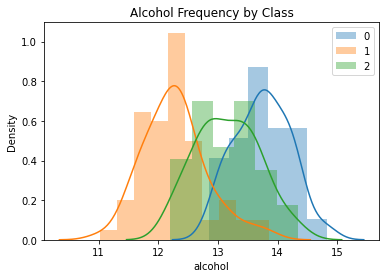

In [6]:
plot_attribute('alcohol')

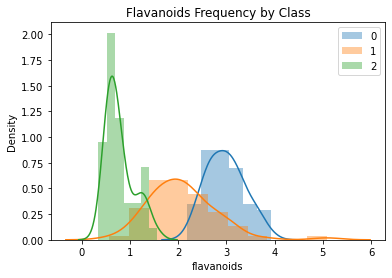

In [7]:
plot_attribute('flavanoids')

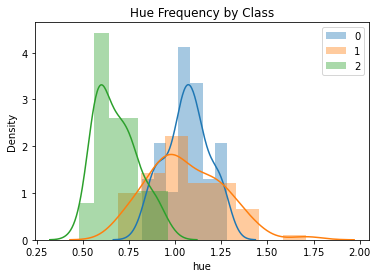

In [8]:
plot_attribute('hue')

Upon viewing these graphs, I noticed that the classifications tended to have a very distinct number of flavanoids which tended to separate itself into the three classes; however, the alcohol levels and hues had quite a bit of overlap. I am also noticing that there may be a trend or correlation between the number of flavanoids and hue based off of the graphs above. 

To complete loading the data, I will split the wine dataset into training and testing sets with sizes being 20% and 80% of the datasets respectively.

In [9]:
wine_train, wine_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Nearest Neighbor

First, I would like to look at one of the first algorithms that we covered in class, the Nearest Neighbor algorithm. This algorithm aims to store all available information and classify new data based on its similarity to the stored information and its respective classification. This can be done simply by either implementing the nearest_neighbor class that we used in class or by using the scikit learn's neighbors functionality. 

In [10]:
class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, q):
        nn = np.argmin(np.linalg.norm(self.X - q,axis=1))
        return nn
    def predict(self, q) :
        return self.y[self.get_nearest(q)]
    
def run_nearest_neighbor(X_train, y_train, X_test, y_test):
    nn = nearest_neighbor()
    nn.fit(X_train, y_train)
    y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
    acc = np.sum(y_pred == y_test)/len(y_test)
    print(f'The accuracy is {acc:.3f}.')

In [11]:
run_nearest_neighbor(wine_train, y_train, wine_test, y_test)

The accuracy is 0.778.


Upon running the algorithm, I discover that it has an accuracy rate of around 78%. While this percentage isn't necessarily bad, I think that we can do better using alternative algorithms.

# K Nearest Neighbor
Next, we will look at some K Nearest Neighbor results and overall accuracy of the training dataset. The first step is defining the kNN class and function required to run and generate the kNN accuracy. Upon writing the code and running the kNN function for k-values 1-10, I realized that the previous section for Nearest Neighbor became redundant. This is because the kNN function includes the Nearest Neighbor's implementation naturally for the first k-value. I have decided, however, to keep that section in to closely document and follow my thought process throughout the project.

In [12]:
class k_nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest_k(self, x, k):
        return np.argsort(np.linalg.norm(self.X - x,axis=1))[0:k]
    def predict(self, k, x, y_true) :
        close  = self.get_nearest_k(x, k)
        votes  = self.y[close]
        winner = stable_bincount_argmax(votes)

        return winner

def stable_bincount_argmax(lst) :
    cnts = np.bincount(lst,minlength=10)
    for neighbor in lst :
        if cnts[neighbor] >= np.max(cnts) :
            return neighbor
    
def run_k_nearest_neighbors(k, X_train, y_train, X_test, y_test) :
    knn = k_nearest_neighbor()
    knn.fit(X_train, y_train)
    y_pred = np.array([knn.predict(k, X_test[i], y_test[i]) for i in range(len(X_test))])
    acc = np.sum(y_pred == y_test)/len(y_test)
    return acc, y_pred

Similarly to like what we have done in class, I'm going to generate some accuracies for odd k-values 1-15.

In [22]:
accuracies = []
num_neighbors = [1,3,5,7,9,11,13,15]


for k in num_neighbors:
    acc, y_pred = run_k_nearest_neighbors(k, wine_train, y_train, wine_test, y_test)
    accuracies.append(acc)

for x in range(0,8):
    print(f'For k={num_neighbors[x]}, the accuracy is {accuracies[x]:.3f}.')

For k=1, the accuracy is 0.778.
For k=3, the accuracy is 0.806.
For k=5, the accuracy is 0.750.
For k=7, the accuracy is 0.694.
For k=9, the accuracy is 0.750.
For k=11, the accuracy is 0.778.
For k=13, the accuracy is 0.722.
For k=15, the accuracy is 0.750.


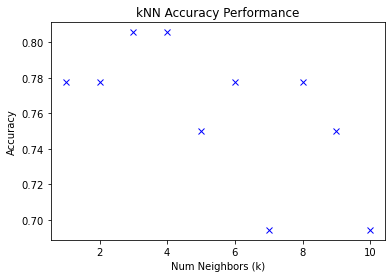

In [14]:
plot_accuracies(accuracies, num_neighbors)

From what I can see here, the accuracies are alright for the kNN functions on the dataset. The best accuracy is 81% at k=3, while the worst accuracy is 69% at k=6 and k=9. I am also noticing that there seems to be a large variance of 12% between the highest and lowest accuracies. Next, I would like to take a quick look at a confusion matrix generated from the y_pred and y_test values with a mid-range accuracy.

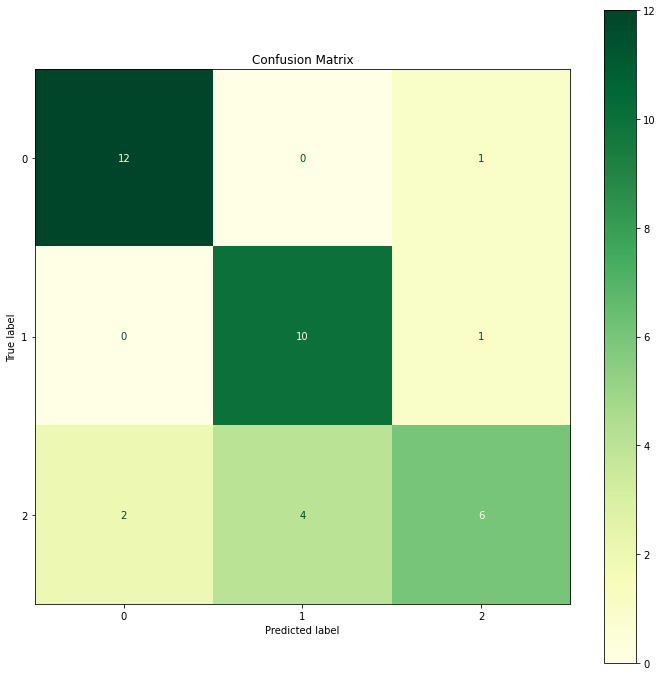

In [20]:
acc, y_pred = run_k_nearest_neighbors(6, wine_train, y_train, wine_test, y_test)
plot_confusion_matrix(y_pred, y_test, 'Confusion Matrix')

At k=6, the nearest neighbors algorithm is generating some true false positives and negatives, which is never a great sign for label predictions. A majority of the values are being properly guessed, however. I will continue to challenge myself to use another algorithm to generate a higher accuracy than 81%.

# Linear Regression

In [15]:
def run_linear_regression(X_train, y_train, X_test, y_test):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        y_pred = linreg.predict(X_test)
        
        y_pred = np.around(y_pred, 0)
        y_pred = y_pred.astype(int)
        acc = np.mean((y_pred == y_test))

    return y_pred, acc

In [16]:
y_pred, acc = run_linear_regression(wine_train, y_train, wine_test, y_test)
print(f'The Linear Regression Accuracy is: {acc:.3f}')

The Linear Regression Accuracy is: 0.917


The predicted classification values for the testing dataset are not very easy to read, because we are expected them to be either 0, 1, or 2. In order to make the classifications easier to read, I will round them to the nearest integer and show the list again.

In [17]:
print('Predicted Classifications:')
print(y_pred)

print('\nActual Classifications:')
print(y_test)

Predicted Classifications:
[0 0 1 0 1 0 1 2 0 1 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]

Actual Classifications:
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


I was surprised to see that the Linear Regression accuracy was the highest so far, especially being at 92%. This prompted me to want to create a confusion matrix to better understand the accuracies.

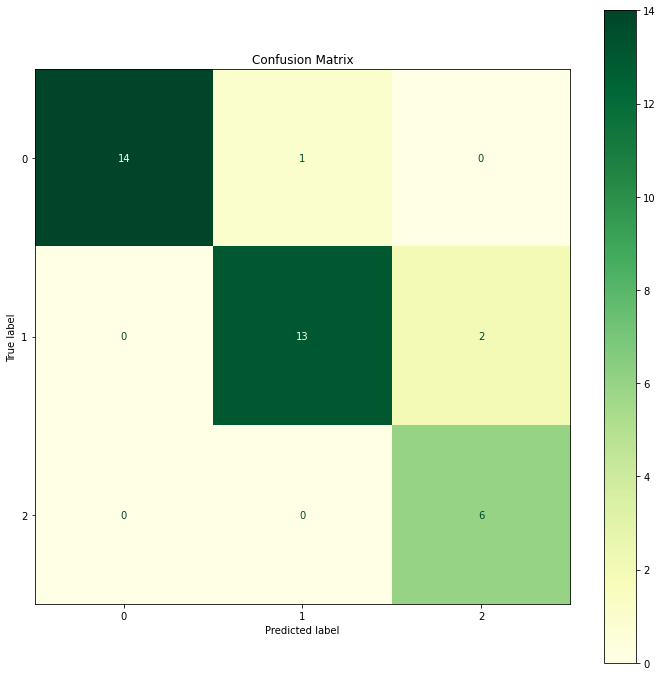

In [18]:
plot_confusion_matrix(y_pred, y_test, 'Confusion Matrix')

The confusion matrix above helped me to understand where the Linear Regression model is lacking in terms of accuracy; however, the model seems to be doing a pretty good job if only 3/36 of the labels are being incorrectly predicted.

# Decision Tree 

With the help of a decision tree, I am now going to attempt to use two features, the hue and flavanoid counts, to try to predict the classification of wine. The main reason for choosing these features is to help me understand if there is a correlation between hue, flavanoids, and the classification that a wine ends up with. 

In [167]:
def run_decision_tree(features):
    X = wine.data[:, features]
    y = wine.target
    fnames = np.array([wine['feature_names'][i] for i in features])

    tree = DecisionTreeClassifier(max_depth=2,random_state=42)
    tree.fit(X, y);

    print(f'Training Set Accuracy is: {tree.score(X,y):2.2f}')

After defining my decision tree algorithm, I will test it out using the features hue and flavanoids.

Training Set Accuracy is: 0.87


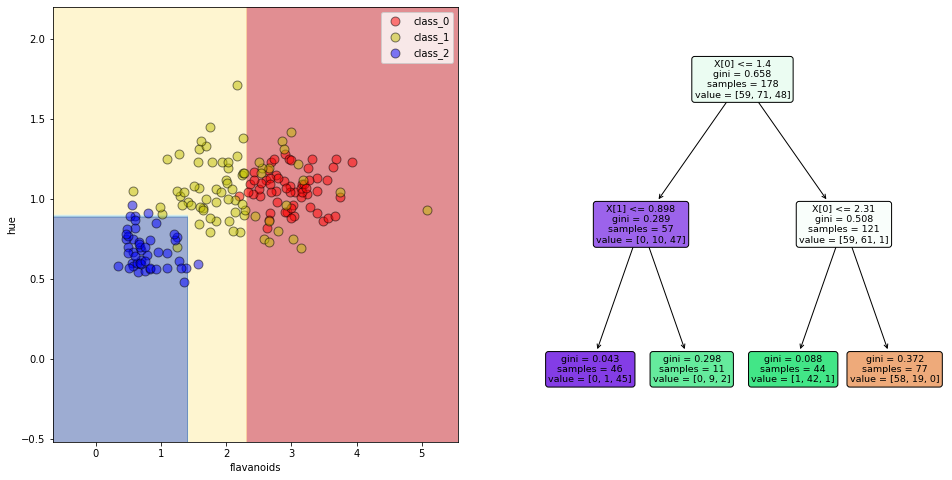

In [224]:
features = [6,10]
run_decision_tree(features)
plot_decision_tree(X)

I was surprised and happy to see that my initial thought about the flavanoids and hue being related may be a true correlation after looking at the results of the decision tree. I am able to notice that, in general, a lower flavanoid count correlates to a lower, or lighter, hue. The likewise can be said about a darker wine's flavanoid count being higher with a higher, or darker, hue. The results of this decision tree helps me to understand that 87% of the time there is a correlation between these values. 

# Conclusions

It was very refreshing being able to look over this dataset, analyze it, and to be able to understand and test my hypothesis regarding the wine distinctions based on hue, flavanoids, and alcohol content. I initially used this data set with the hopes of predicting wines based off of my custom inputs, but I ended up finding it much more exciting and interesting to see the distinctions between the classes and attributes. As a result, I spent more time thinking about what kinds of wine the three different classes could have based off of these factors. 

In the end, I hypothesized that class 0 is a dark, red wine with high alcohol content. Unfortunately, there are many kinds of dark, red wines with a high alcohol content such as Cabernet Sauvignons, Syrahs, and Merlots. Next, I hypothesized that class 1 is a low alcohol content, mid-range flavanoid count, and darker hue. Since I am already assuming that the wine is a red based off of the hue range and flavanoid count, I am hypothesizing that class 1 is a cool climate Pinot Noir or a French Gamay. Finally, class 2 has a mid-range alcohol content, low flavanoid count and lighter hue. The low flavanoid count and lighter hue indicate that the wine is going to most likely be a white wine. As such, I will hypothesize that class 2 is a white wine like a Riesling, Pinot Grigio, Pinot Gris, or Sauvignon Blanc. 

I was pretty surprised to see that my K Nearest Neighbor function performed the most poorly out of all of the training models that I created at a 81%. After checking out the results from the other models, I have decided that the Linear Regression model is by far the best model to use when predicting and classifying the data in this wine set; however, the decision tree results were closs behind at a 87%. 

I found it really interesting looking at the decision tree and the graph it created. It really hit home to me how different the wine classifications are minus a few outliers. If given more time in the future, I would love to play around with the models I created with test data that I created myself after doing research on the attributes of specific wines. I would love to see if I could properly guess what the classification would closest be for wines like Rosés, Moscatos, and Sweet Red Wines.